In [1]:
%%capture
import matplotlib.pyplot as plt
import numpy as np
import cv2

# try: cv2.setNumThreads(0)
# except: pass
from caiman import movie
import os
# %matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
from itertools import product
from collections import OrderedDict

from sys import path as syspath
syspath.append(os.path.expanduser("~/srdjan_functs/"))

from physio_def_1 import *
from matplotlib.colors import LogNorm

from numeric import *
from collections import Counter

# Importing

In [2]:
npzFiles = [
    "local_data/Sandra/2019_10_15/Experiment38a/Experiment38a_18_Series040.npz"
#     "local_data/Sandra/2020_01_14/Experiment45c/Experiment45c_1_Series003.npz",
#     "local_data/Sandra/2020_01_14/Experiment45c/Experiment45c_2_Series004.npz",
#     "local_data/Sandra/2020_01_14/Experiment45b/Experiment45b_1_Series006.npz",
#     "local_data/Sandra/2020_01_14/Experiment45b/Experiment45b_2_Series007.npz",
#     "local_data/Sandra/2020_01_14/Experiment45b/Experiment45b_3_Series008.npz"

]
# npzFile = f"/Volumes/physio/team/slakrupnik/project/experiments/Sandra/{row.date}/{row.filename.split('_')[0]}/{row.filename}.npz"
metadata = pd.DataFrame([pd.read_csv(npzFile.replace("npz","txt")).loc[0] for npzFile in npzFiles])

In [3]:
if len(metadata)>1:
    assert metadata.X.std()==0
    assert metadata.Y.std()==0
    assert metadata.freq.std()/metadata.freq.mean()<1e-3
    print ((metadata["T"]/metadata["freq"]/60).sum(), "minutes")
    origFreq = metadata.freq.mean()
    metadata["T"] = metadata["T"].sum()
    metadata = pd.Series(metadata.iloc[0])
    metadata["freq"] = origFreq
else:
    metadata = metadata.iloc[0]
    origFreq = metadata.freq
    print (metadata["T"]/metadata.freq/60, "minutes")

43.0743682536561 minutes


In [4]:
orig_images = import_npz_files(npzFiles)
m_orig = movie(orig_images.astype("float32"))
del orig_images
m_orig.fr = origFreq

time = np.arange(len(m_orig)).astype(np.float32)/metadata.freq
allTrace = m_orig.mean(axis=(1,2))
Nsatur = np.sum(m_orig>m_orig.max()-1, axis=(1,2))

In [5]:
baseName = getBaseName(npzFiles)

In [6]:
shifted_images = import_npz_files([baseName+"_motcor.npz"])

In [7]:
m_corr = movie(shifted_images)
del shifted_images

In [8]:
m_corr.dtype, m_orig.dtype

(dtype('uint8'), dtype('float32'))

In [9]:
m_corr.fr = m_orig.fr

In [10]:
from caiman import concatenate

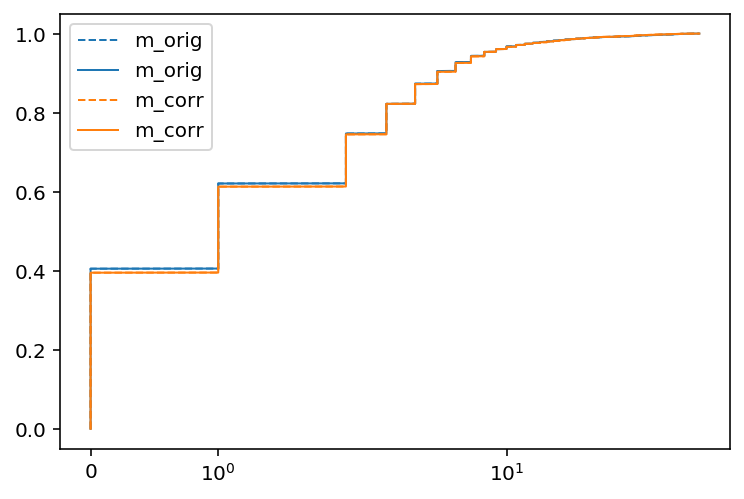

In [11]:
orig_min = m_orig.min()
orig_max = m_orig.max()
for m in ["m_orig","m_corr"]:
    try:
        x = eval(m)
        x = x[::len(x)//100,::10,::10].flatten()
    except:
        continue
    c = plt.plot([])[0].get_color()
    x.sort()
    for ls in["--","-"]:
        if len(ls)==1:
            x[x<orig_min] = orig_min
            x[x>orig_max] = orig_max
        plt.plot(x,np.linspace(0,1,len(x)),lw=1,label=m,ls=ls,c=c)
plt.xscale("symlog")
# plt.yscale("logit")
plt.legend()

In [13]:
m_corr.max(), m_orig.max()

(movie(88, dtype=uint8), movie(87., dtype=float32))

In [14]:
timeSlice = slice(int(len(m_orig)*.0),int(len(m_orig)*1))

nTimeFrames = 3000
nRebinShow = len(m_orig[timeSlice])//nTimeFrames
border = np.ones((len(m_orig[timeSlice])//nRebinShow,1,m_orig.shape[-1]))*m_orig.max()
m2show = concatenate([
    rebin(m_orig[timeSlice], nRebinShow),
    border,
    rebin(m_corr[timeSlice], nRebinShow),
],axis=1)

In [15]:
showMovie(np.log(1+m2show),figsize=(10,5), out="save", saveName=baseName+".mp4")

In [16]:
baseName

'local_data/Sandra/2019_10_15/Experiment38a/Experiment38a_18_Series040'